In [1]:
from google.colab import files
uploaded = files.upload()

Saving 005380.KS.csv to 005380.KS.csv


In [ ]:
import io
import pandas as pd
import numpy as np

df = pd.read_csv(io.BytesIO(uploaded['005380.KS.csv']))

In [ ]:
df.tail(5)

,Date,Open,High,Low,Close,Adj Close,Volume
1592,2022-07-01,181500.0,185000.0,179500.0,180000.0,180000.0,916020
1593,2022-07-04,181000.0,183000.0,175000.0,178000.0,178000.0,1006440
1594,2022-07-05,180000.0,181000.0,173500.0,177500.0,177500.0,1097504
1595,2022-07-06,176000.0,177000.0,172000.0,172500.0,172500.0,924184
1596,2022-07-07,175000.0,177000.0,172500.0,175000.0,175000.0,533982


In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1597.000000,1597.000000,1597.000000,1597.000000,1597.000000,1.597000e+03
mean,154361.803381,156421.102066,152374.264245,154366.812774,143827.349180,8.989269e+05
std,37613.526153,38051.674393,37076.101817,37466.861725,39961.011583,1.035901e+06
min,67200.000000,71000.000000,65000.000000,65900.000000,63380.367188,0.000000e+00
25%,128500.000000,130000.000000,127000.000000,128500.000000,116526.539063,4.247380e+05
50%,144500.000000,146500.000000,143500.000000,144500.000000,128395.742188,5.945770e+05
75%,175000.000000,178000.000000,173000.000000,175500.000000,172156.078125,9.492470e+05
max,271000.000000,289000.000000,259500.000000,267500.000000,261410.781250,1.993370e+07


In [ ]:
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pyplot as plt
tf.random.set_seed(123)
np.random.seed(123)
import numpy as np

from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from statsmodels.tsa.api import VAR

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df['Date']=pd.to_datetime(df['Date'],infer_datetime_format=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1597 entries, 0 to 1596
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1597 non-null   datetime64[ns]
 1   Open       1597 non-null   float64       
 2   High       1597 non-null   float64       
 3   Low        1597 non-null   float64       
 4   Close      1597 non-null   float64       
 5   Adj Close  1597 non-null   float64       
 6   Volume     1597 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 87.5 KB


In [ ]:
df=df.set_index('Date')


In [ ]:
df=df.resample('M').mean()
df=df.fillna(df.mean())

In [ ]:
df.head(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-31,138700.000000,140525.000000,136525.000000,138550.000000,118276.581250,564416.600000
2016-02-29,139694.444444,142194.444444,138194.444444,140861.111111,120249.522570,569501.111111
2016-03-31,151000.000000,152522.727273,149181.818182,151000.000000,128904.828480,468245.954545
2016-04-30,149100.000000,150875.000000,147275.000000,148975.000000,127176.133985,396304.900000
2016-05-31,136725.000000,138250.000000,135400.000000,136375.000000,116419.837891,486571.250000


In [ ]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(df['Open'].dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -2.330036
p-value: 0.162464


In [ ]:
df=df.reset_index()

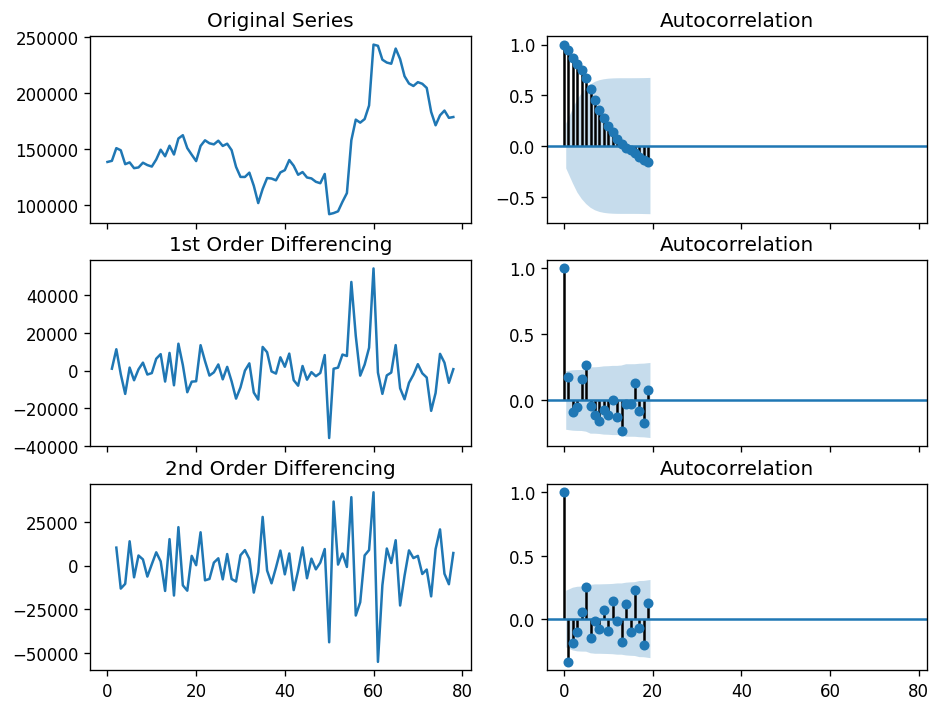

In [ ]:
import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(df['Open']); axes[0, 0].set_title('Original Series')
plot_acf(df['Open'], ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df['Open'].diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df['Open'].diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df['Open'].diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df['Open'].diff().diff().dropna(), ax=axes[2, 1])

plt.show()

In [ ]:
df=df.set_index('Date')

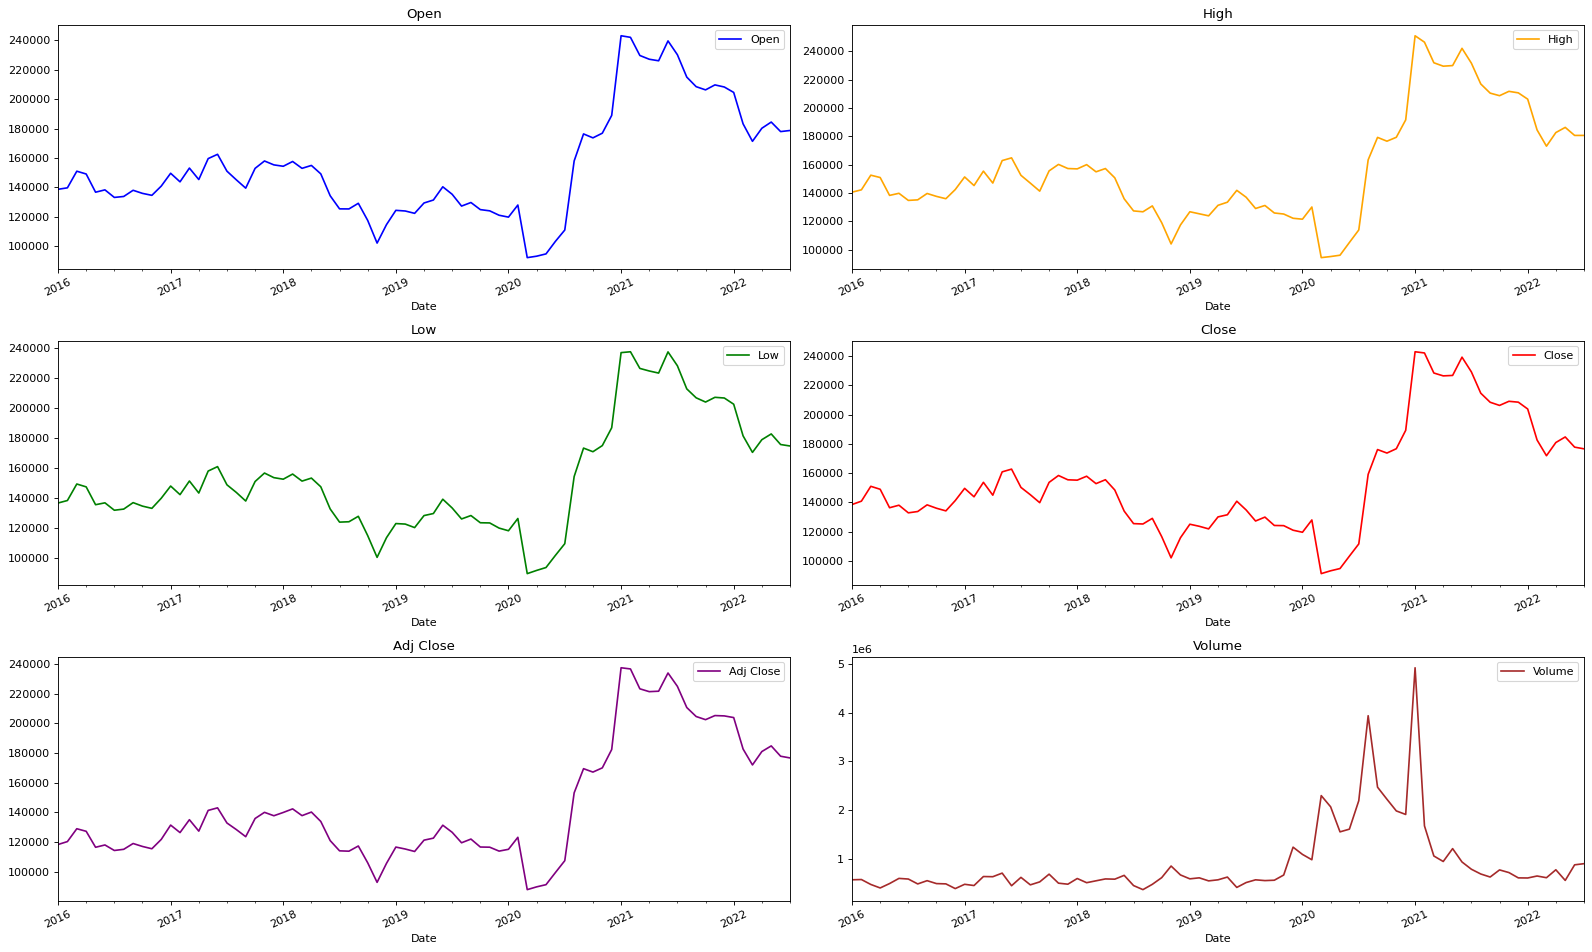

In [ ]:
color_list = [
    "blue",
    "orange",
    "green",
    "red",
    "purple",
    "brown",
    "pink",
    "gray",
    "olive",
    "cyan",
]


def Visualize(data):
    features= list(df.select_dtypes(include=[np.number]).columns.values)
    feature_size=len(features)
    fig, axes = plt.subplots(
        nrows=int(np.ceil(feature_size/2)), ncols=2, figsize=(20,feature_size*2), dpi=80, facecolor="w", edgecolor="k"
    )
    for i in range(feature_size):
        key = features[i]
        c = color_list[i % (len(color_list))]
        t_data = data[key]
        t_data.head()
        ax = t_data.plot(
            ax=axes[i // 2, i % 2],
            color=c,
            title="{}".format(key),
            rot=25,
        )
        ax.legend([key])
    plt.tight_layout()


Visualize(df)

In [ ]:
df=df.reset_index()

Epoch 1/100
50/50 - 2s - loss: 0.0752 - 2s/epoch - 43ms/step
Epoch 2/100
50/50 - 0s - loss: 0.0468 - 121ms/epoch - 2ms/step
Epoch 3/100
50/50 - 0s - loss: 0.0266 - 123ms/epoch - 2ms/step
Epoch 4/100
50/50 - 0s - loss: 0.0144 - 251ms/epoch - 5ms/step
Epoch 5/100
50/50 - 0s - loss: 0.0093 - 252ms/epoch - 5ms/step
Epoch 6/100
50/50 - 0s - loss: 0.0080 - 200ms/epoch - 4ms/step
Epoch 7/100
50/50 - 0s - loss: 0.0077 - 135ms/epoch - 3ms/step
Epoch 8/100
50/50 - 0s - loss: 0.0076 - 182ms/epoch - 4ms/step
Epoch 9/100
50/50 - 0s - loss: 0.0075 - 124ms/epoch - 2ms/step
Epoch 10/100
50/50 - 0s - loss: 0.0075 - 152ms/epoch - 3ms/step
Epoch 11/100
50/50 - 0s - loss: 0.0074 - 150ms/epoch - 3ms/step
Epoch 12/100
50/50 - 0s - loss: 0.0073 - 159ms/epoch - 3ms/step
Epoch 13/100
50/50 - 0s - loss: 0.0072 - 170ms/epoch - 3ms/step
Epoch 14/100
50/50 - 0s - loss: 0.0072 - 119ms/epoch - 2ms/step
Epoch 15/100
50/50 - 0s - loss: 0.0070 - 111ms/epoch - 2ms/step
Epoch 16/100
50/50 - 0s - loss: 0.0070 - 105ms/epoc

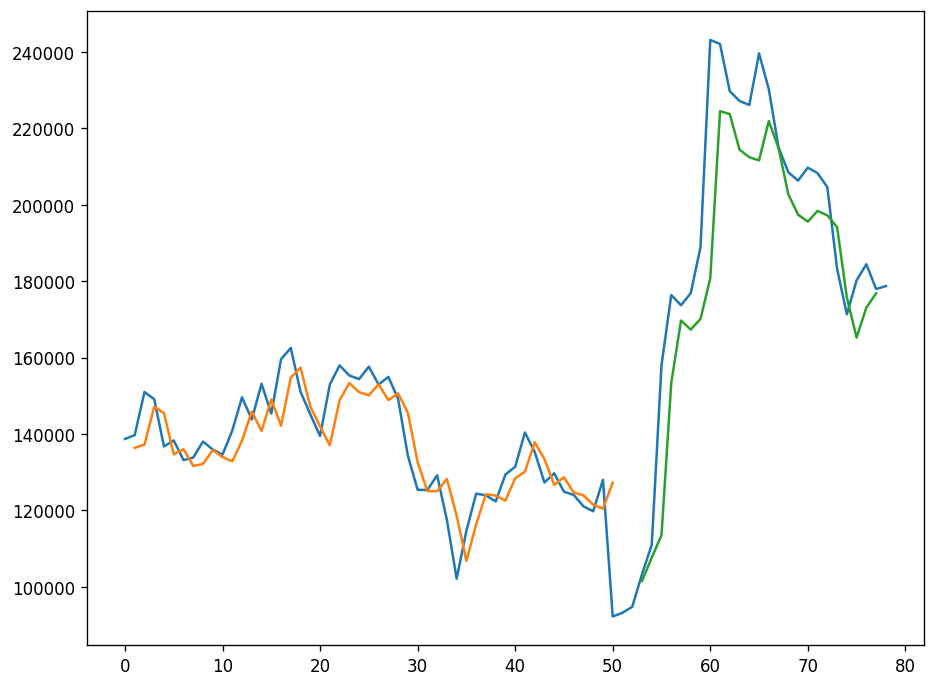

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
import math
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

tf.random.set_seed(7)

dataframe=pd.DataFrame()
dataframe['Open']=df['Open']
dataset = dataframe.values
dataset = dataset.astype('float32')

scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

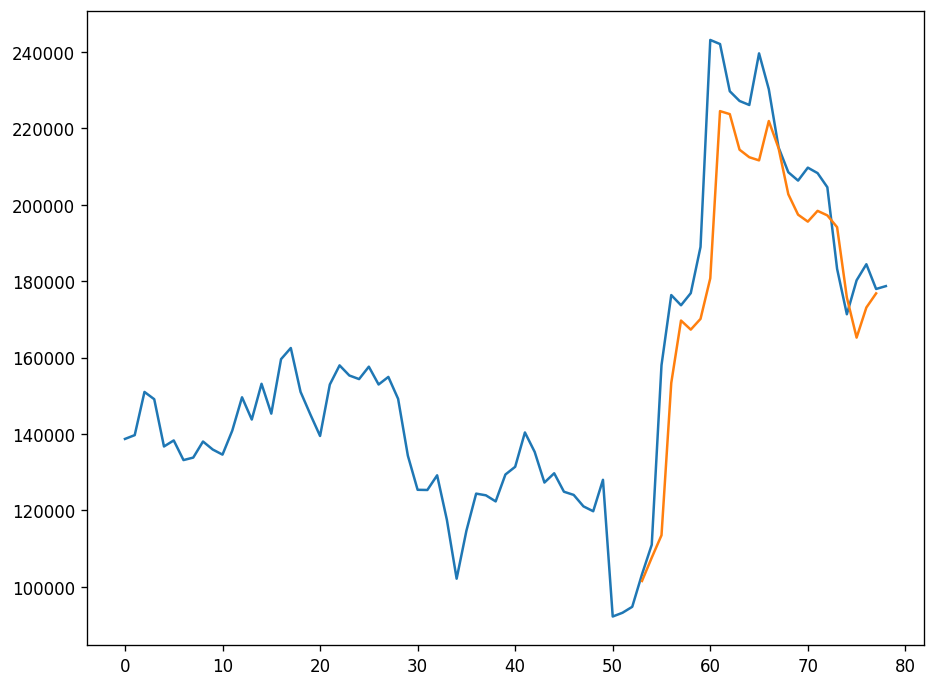

In [ ]:

plt.plot(scaler.inverse_transform(dataset))
# plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

Epoch 1/100
48/48 - 2s - loss: 0.0733 - 2s/epoch - 34ms/step
Epoch 2/100
48/48 - 0s - loss: 0.0401 - 74ms/epoch - 2ms/step
Epoch 3/100
48/48 - 0s - loss: 0.0200 - 78ms/epoch - 2ms/step
Epoch 4/100
48/48 - 0s - loss: 0.0103 - 74ms/epoch - 2ms/step
Epoch 5/100
48/48 - 0s - loss: 0.0074 - 75ms/epoch - 2ms/step
Epoch 6/100
48/48 - 0s - loss: 0.0070 - 90ms/epoch - 2ms/step
Epoch 7/100
48/48 - 0s - loss: 0.0068 - 79ms/epoch - 2ms/step
Epoch 8/100
48/48 - 0s - loss: 0.0067 - 70ms/epoch - 1ms/step
Epoch 9/100
48/48 - 0s - loss: 0.0066 - 72ms/epoch - 1ms/step
Epoch 10/100
48/48 - 0s - loss: 0.0065 - 81ms/epoch - 2ms/step
Epoch 11/100
48/48 - 0s - loss: 0.0064 - 76ms/epoch - 2ms/step
Epoch 12/100
48/48 - 0s - loss: 0.0063 - 83ms/epoch - 2ms/step
Epoch 13/100
48/48 - 0s - loss: 0.0062 - 93ms/epoch - 2ms/step
Epoch 14/100
48/48 - 0s - loss: 0.0061 - 103ms/epoch - 2ms/step
Epoch 15/100
48/48 - 0s - loss: 0.0061 - 81ms/epoch - 2ms/step
Epoch 16/100
48/48 - 0s - loss: 0.0059 - 80ms/epoch - 2ms/step
E

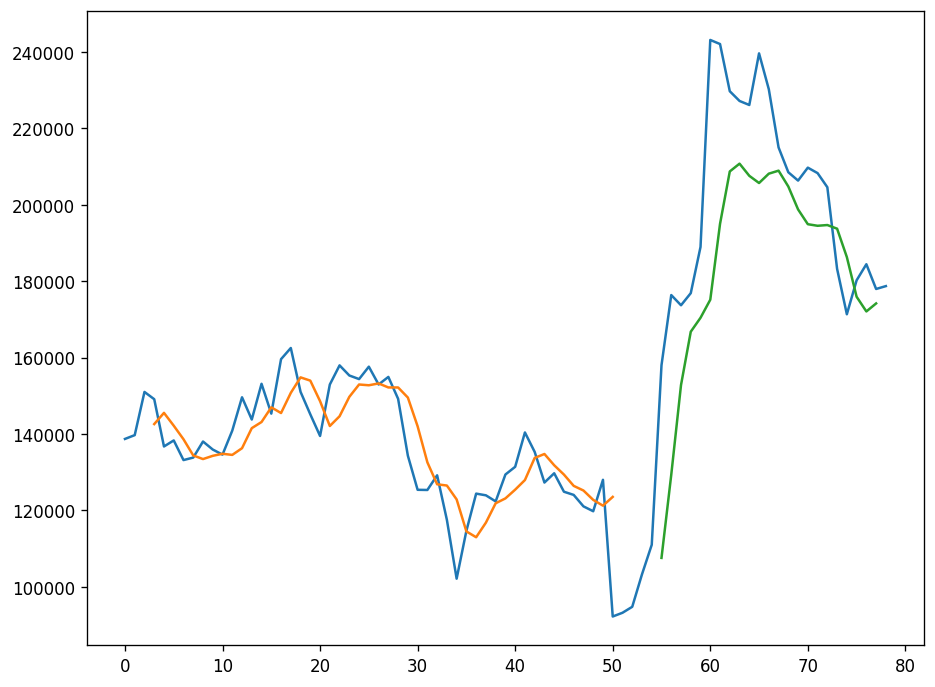

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from pandas import read_csv
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

tf.random.set_seed(7)

dataframe=pd.DataFrame()
dataframe['Open']=df['Open']
dataset = dataframe.values
dataset = dataset.astype('float32')

scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

Epoch 1/100
48/48 - 2s - loss: 0.0610 - 2s/epoch - 34ms/step
Epoch 2/100
48/48 - 0s - loss: 0.0254 - 97ms/epoch - 2ms/step
Epoch 3/100
48/48 - 0s - loss: 0.0101 - 86ms/epoch - 2ms/step
Epoch 4/100
48/48 - 0s - loss: 0.0072 - 97ms/epoch - 2ms/step
Epoch 5/100
48/48 - 0s - loss: 0.0071 - 87ms/epoch - 2ms/step
Epoch 6/100
48/48 - 0s - loss: 0.0071 - 88ms/epoch - 2ms/step
Epoch 7/100
48/48 - 0s - loss: 0.0069 - 93ms/epoch - 2ms/step
Epoch 8/100
48/48 - 0s - loss: 0.0068 - 97ms/epoch - 2ms/step
Epoch 9/100
48/48 - 0s - loss: 0.0067 - 92ms/epoch - 2ms/step
Epoch 10/100
48/48 - 0s - loss: 0.0066 - 90ms/epoch - 2ms/step
Epoch 11/100
48/48 - 0s - loss: 0.0064 - 93ms/epoch - 2ms/step
Epoch 12/100
48/48 - 0s - loss: 0.0063 - 95ms/epoch - 2ms/step
Epoch 13/100
48/48 - 0s - loss: 0.0062 - 85ms/epoch - 2ms/step
Epoch 14/100
48/48 - 0s - loss: 0.0060 - 85ms/epoch - 2ms/step
Epoch 15/100
48/48 - 0s - loss: 0.0060 - 88ms/epoch - 2ms/step
Epoch 16/100
48/48 - 0s - loss: 0.0059 - 91ms/epoch - 2ms/step
Ep

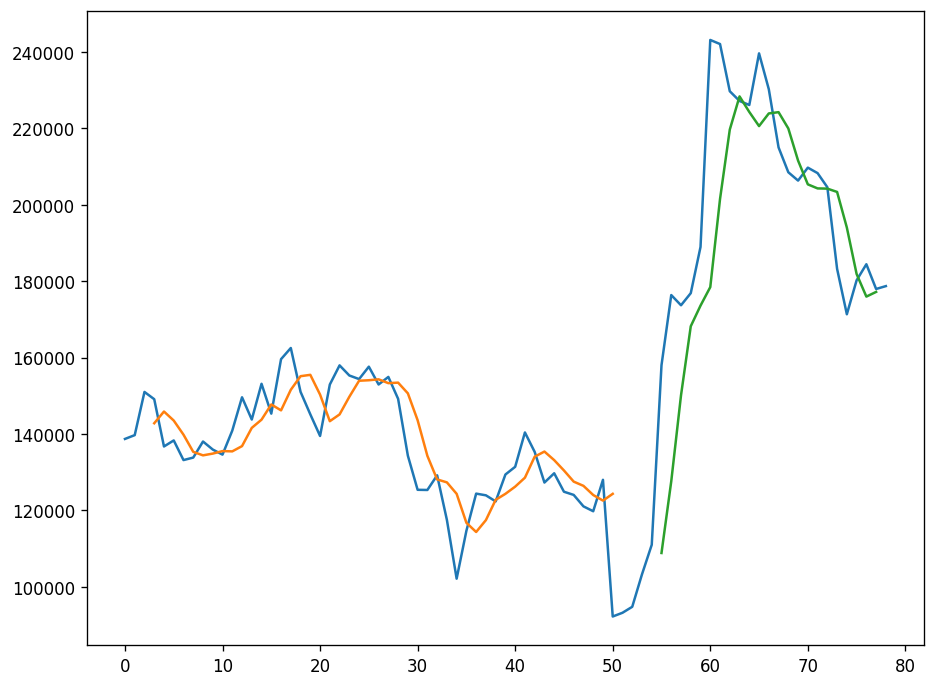

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

tf.random.set_seed(7)

dataframe=pd.DataFrame()
dataframe['Open']=df['Open']
dataset = dataframe.values
dataset = dataset.astype('float32')

scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))

model = Sequential()
model.add(LSTM(4, input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

48/48 - 2s - loss: 0.0417 - 2s/epoch - 33ms/step
48/48 - 0s - loss: 0.0120 - 96ms/epoch - 2ms/step
48/48 - 0s - loss: 0.0092 - 92ms/epoch - 2ms/step
48/48 - 0s - loss: 0.0091 - 99ms/epoch - 2ms/step
48/48 - 0s - loss: 0.0088 - 86ms/epoch - 2ms/step
48/48 - 0s - loss: 0.0086 - 112ms/epoch - 2ms/step
48/48 - 0s - loss: 0.0084 - 99ms/epoch - 2ms/step
48/48 - 0s - loss: 0.0082 - 80ms/epoch - 2ms/step
48/48 - 0s - loss: 0.0080 - 88ms/epoch - 2ms/step
48/48 - 0s - loss: 0.0078 - 90ms/epoch - 2ms/step
48/48 - 0s - loss: 0.0077 - 101ms/epoch - 2ms/step
48/48 - 0s - loss: 0.0075 - 96ms/epoch - 2ms/step
48/48 - 0s - loss: 0.0074 - 85ms/epoch - 2ms/step
48/48 - 0s - loss: 0.0072 - 88ms/epoch - 2ms/step
48/48 - 0s - loss: 0.0071 - 92ms/epoch - 2ms/step
48/48 - 0s - loss: 0.0070 - 93ms/epoch - 2ms/step
48/48 - 0s - loss: 0.0069 - 96ms/epoch - 2ms/step
48/48 - 0s - loss: 0.0067 - 82ms/epoch - 2ms/step
48/48 - 0s - loss: 0.0066 - 91ms/epoch - 2ms/step
48/48 - 0s - loss: 0.0065 - 88ms/epoch - 2ms/step

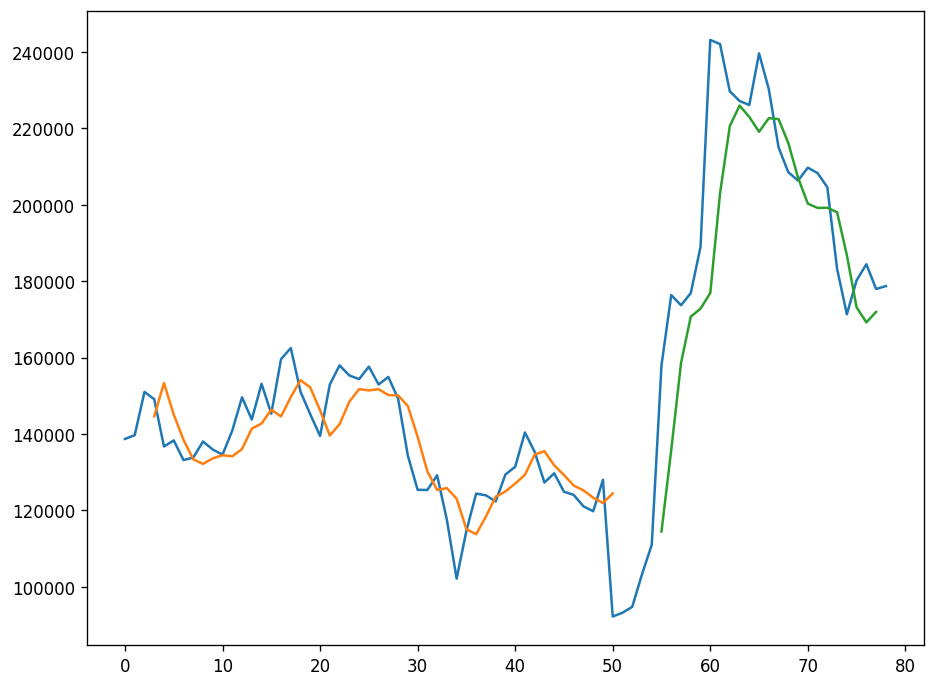

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

tf.random.set_seed(7)

dataframe=pd.DataFrame()
dataframe['Open']=df['Open']
dataset = dataframe.values
dataset = dataset.astype('float32')

scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))

batch_size = 1
model = Sequential()
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
for i in range(100):
	model.fit(trainX, trainY, epochs=1, batch_size=batch_size, verbose=2, shuffle=False)
	model.reset_states()

trainPredict = model.predict(trainX, batch_size=batch_size)
model.reset_states()
testPredict = model.predict(testX, batch_size=batch_size)

trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

48/48 - 4s - loss: 0.0493 - 4s/epoch - 82ms/step
48/48 - 0s - loss: 0.0131 - 135ms/epoch - 3ms/step
48/48 - 0s - loss: 0.0157 - 130ms/epoch - 3ms/step
48/48 - 0s - loss: 0.0145 - 127ms/epoch - 3ms/step
48/48 - 0s - loss: 0.0142 - 147ms/epoch - 3ms/step
48/48 - 0s - loss: 0.0138 - 142ms/epoch - 3ms/step
48/48 - 0s - loss: 0.0135 - 128ms/epoch - 3ms/step
48/48 - 0s - loss: 0.0133 - 144ms/epoch - 3ms/step
48/48 - 0s - loss: 0.0130 - 146ms/epoch - 3ms/step
48/48 - 0s - loss: 0.0128 - 139ms/epoch - 3ms/step
48/48 - 0s - loss: 0.0126 - 126ms/epoch - 3ms/step
48/48 - 0s - loss: 0.0124 - 134ms/epoch - 3ms/step
48/48 - 0s - loss: 0.0122 - 134ms/epoch - 3ms/step
48/48 - 0s - loss: 0.0120 - 139ms/epoch - 3ms/step
48/48 - 0s - loss: 0.0118 - 130ms/epoch - 3ms/step
48/48 - 0s - loss: 0.0116 - 140ms/epoch - 3ms/step
48/48 - 0s - loss: 0.0113 - 129ms/epoch - 3ms/step
48/48 - 0s - loss: 0.0110 - 141ms/epoch - 3ms/step
48/48 - 0s - loss: 0.0107 - 144ms/epoch - 3ms/step
48/48 - 0s - loss: 0.0104 - 131ms

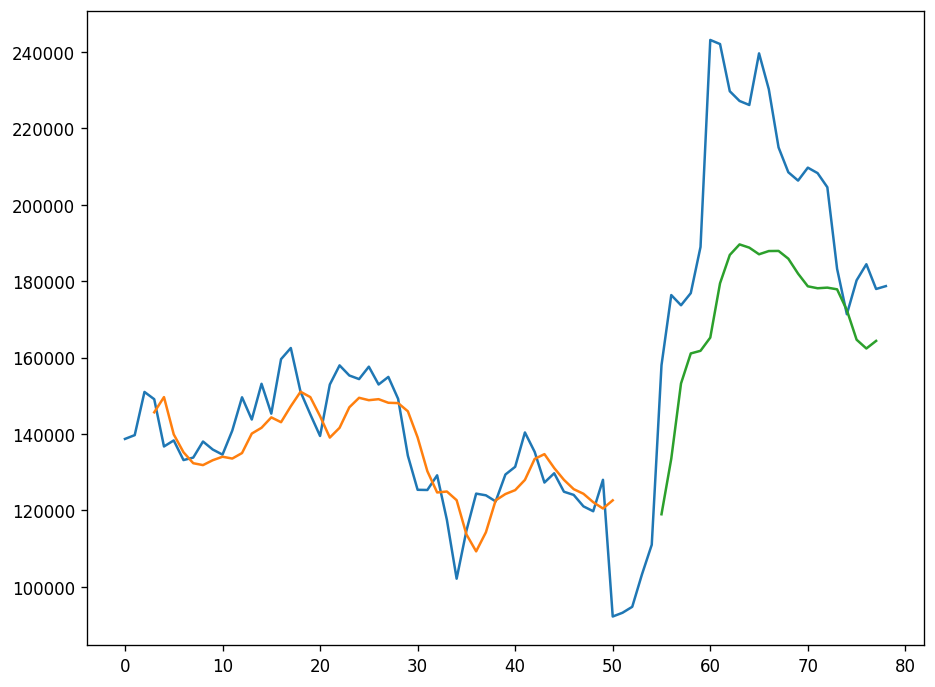

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

tf.random.set_seed(7)


dataframe=pd.DataFrame()
dataframe['Open']=df['Open']
dataset = dataframe.values
dataset = dataset.astype('float32')

scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))

batch_size = 1
model = Sequential()
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True, return_sequences=True))
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
for i in range(100):
	model.fit(trainX, trainY, epochs=1, batch_size=batch_size, verbose=2, shuffle=False)
	model.reset_states()

trainPredict = model.predict(trainX, batch_size=batch_size)
model.reset_states()
testPredict = model.predict(testX, batch_size=batch_size)

trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()